### Import Packages and Reading of Data

In [20]:
import time
import warnings
import pickle

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.pipeline import make_pipeline

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [21]:
# Reading of Excel
dataset = pd.read_csv('cleaned_others_dataset.csv')

In [22]:
dataset

,verified,location,followers_count,following_count,tweet_count,isFraud,un_no_of_char,un_special_char,un_uppercase,name_no_of_char,name_special_char,name_uppercase,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,1,785,829,251,0,12,0,1,8,0,1,0,0,0,1,2016,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,243,1232,1469,0,8,0,1,11,0,0,0,0,0,1,2017,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,1,737048,128,4739,0,13,0,1,14,0,1,1,0,0,1,2012,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,1,281703,1599,14785,0,14,0,0,16,0,1,1,0,1,1,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24549,1,0,2025977,947,194749,0,11,1,0,13,0,1,1,0,0,1,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
24550,1,1,367523,17291,24084,0,14,0,1,10,0,1,2,0,0,1,2009,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
24551,0,0,395,492,21437,1,14,0,1,16,0,1,0,0,0,1,2012,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
24552,0,0,159,618,3021,0,8,0,1,14,0,1,0,0,0,0,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


### Feature Engineering

In [23]:
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(columns=["isFraud"]), dataset["isFraud"], test_size = 0.2, random_state=101)
print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (19643, 35) (19643,)
Test set: (4911, 35) (4911,)


In [24]:
scaler = StandardScaler()
fitted = scaler.fit(X_train)
X_train_fitted = fitted.transform(X_train)
X_test_fitted = fitted.transform(X_test)

In [25]:
x_train = pd.DataFrame(X_train_fitted, columns = X_train.columns)
x_test = pd.DataFrame(X_test_fitted, columns = X_test.columns)
y_train = pd.DataFrame(y_train, columns = ["isFraud"])
y_test = pd.DataFrame(y_test, columns = ["isFraud"])

### Charts

In [26]:
def feature_chart(feature_importance_df, model_type):
#     feature_importance_df = pd.DataFrame(model.coef_.T, x_train.columns.T,columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
    fig = feature_importance_df.plot(kind="barh", figsize=(12, 15))
    bg = fig.patch
    bg.set_facecolor("white")
    plt.gca().invert_yaxis()
    plt.grid()
#     plt.savefig(f'Charts\\{model_type} Feature Importance.png', dpi=300, facecolor=fig.get_facecolor())
    plt.show()

### Logistic Regression (Baseline)
* Model
* Error Metrics
* Plot for Feature Importance

#### Model

In [27]:
# Model
log_regression = LogisticRegression()
log_model_pipeline = make_pipeline(StandardScaler(), log_regression)
log_model = log_model_pipeline.fit(x_train, y_train)

In [28]:
# Save the model to disk
filename = '01 Logistic Regression.sav'
pickle.dump(log_model, open(filename, 'wb'))

# Load the model from disk
# results_random = pickle.load(open(filename, 'rb'))

In [29]:
# Accuracy
log_model.score(x_train, y_train)

0.800132362673726

In [30]:
# y_prediction
y_pred = log_model.predict(x_test)

In [31]:
# Error Metrics
lg_loss = metrics.log_loss(y_test, y_pred)
print(f'Log Loss: {lg_loss}')
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')
f1_score = metrics.f1_score(y_test, y_pred)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred)
print(f'Recall: {recall}')

Log Loss: 6.906373276117746
ROC AUC: 0.601103859142264
F1-score: 0.3505291005291005
Precision: 0.6370192307692307
Recall: 0.2417883211678832


#### Feature Importance

In [32]:
# Feature importance
feature = pd.DataFrame(log_model.named_steps["logisticregression"].coef_.T, x_train.columns.T, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
feature

,Feature Importance
des_external_links,0.392584
tweet_count,0.383112
year,0.325058
following_count,0.103841
Oct,0.056894
Dec,0.043410
Fri,0.036696
name_no_of_char,0.028923
Nov,0.027349
May,0.025113


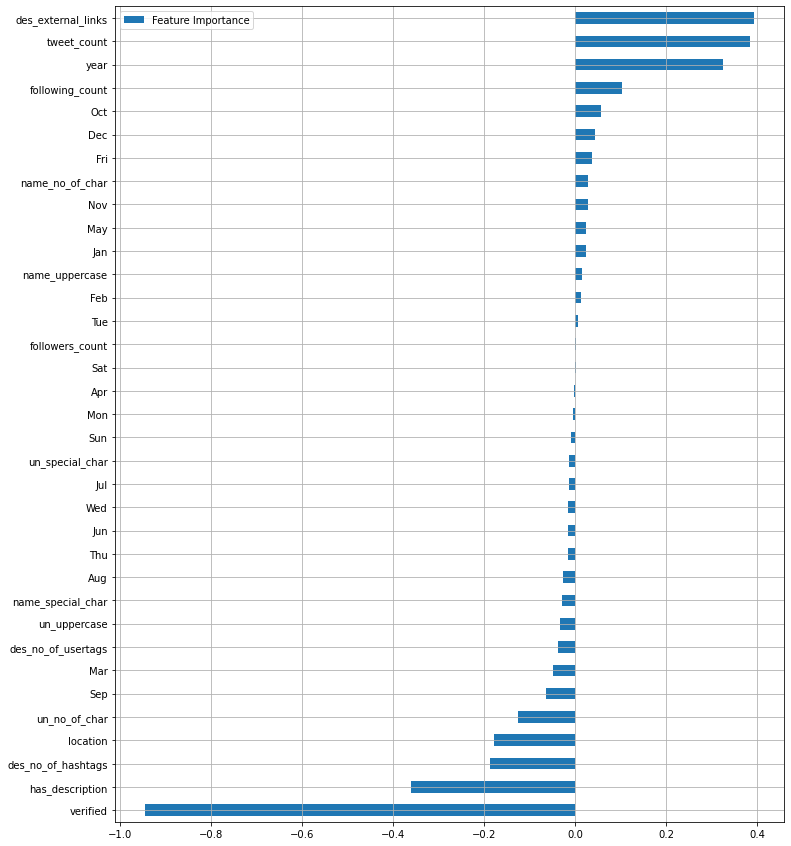

In [33]:
# Feature importance
feature_chart(feature, "Logistic Regression")